This notebook is quite important because this is where I learned how to use `ax.twinx()` to create dual-axis plot.

In [1]:
# Activate libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data for writing phase
df = pd.read_csv("data/Qual Exam Stat.csv")

# Preparing data as list. These will be used in place of markers
day_since = df['Day_Elapsed'].to_list()
total_words = df['Total_Words'].to_list()
total_hours = df['Total_Hours'].to_list()

In [3]:
# Functionize some function calls
def twin_plotter(data, ax, x_axis, y_axis, color, axis_label = 'Axis Label'):
    # Main plotter
    data.plot(ax = ax, x = x_axis, y = y_axis, color = color, legend = False,
             marker = 'o', markerfacecolor = 'white', markersize = 12, markeredgecolor = 'white')
    
    # Generalized customization
    ax.tick_params(axis = "y", labelcolor = color)
    ax.set_ylabel(axis_label, fontsize = 10, color = color)
    
# Print them numbers
def print_number_markers():
    # For total words written
    for x, y in zip(day_since, total_words):
        words_k = f'{str(round(y / 1000, 1))}k'
        #ax1.text(x = x-0.25, y = y-100, s = words_k, fontsize = 6, color = 'blue')
        ax1.text(x = x, y = y, ha = 'center', va = 'center', s = words_k, fontsize = 6, color = 'blue')
    
    # For total hours spent
    for x, y in zip(day_since, total_hours):
        hours_round = round(y, 1)
        #ax2.text(x = x-0.25, y = y-0.2, s = hours_round, fontsize = 6, color = 'red')
        ax2.text(x = x, y = y, ha = 'center', va = 'center', s = hours_round, fontsize = 6, color = 'red')

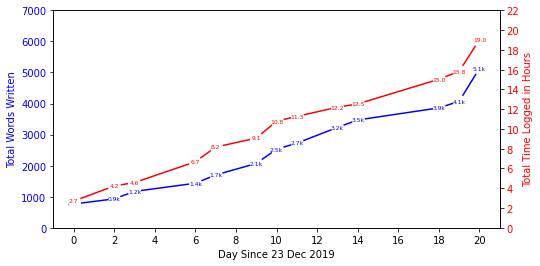

In [4]:
# Instantiate Figure and Axes Objects, with .twinx() for dual-axis configuration
fig, ax1 = plt.subplots(figsize = (8,4))
ax2 = ax1.twinx()

# Plot for Axis 1 on total words written
twin_plotter(data = df, ax = ax1, x_axis = 'Day_Elapsed', y_axis = 'Total_Words', color = 'blue', 
             axis_label = 'Total Words Written')
ax1.set_xlabel("Day Since 23 Dec 2019")
ax1.set_yticks(range(0, 8000, 1000))
ax1.set_xticks([0,2,4,6,8,10,12,14, 16,18,20])
ax1.set_xlim([-1,21])

# Another axis 2 on time spent 
twin_plotter(data = df, ax = ax2, x_axis = 'Day_Elapsed', y_axis = 'Total_Hours', color = 'red', 
             axis_label = 'Total Time Logged in Hours')
ax2.set_yticks(range(0, 24, 2))

# Print number markers
print_number_markers()

# Global legend
#fig.legend(loc = "upper left", bbox_to_anchor = (0.125, 0.875), frameon = False)

# Save figure
#fig.savefig("Qual Exam Stat.png", format = "png", dpi = 300, bbox_inches = "tight")

# Show plot
plt.show()